# Particle Swarm Optimization (PSO)

PSO is a population-based optimization tool, which could be implemented and applied easily to solve various function optimization problems, or the problems that can be transformed to function optimization problems. As an algorithm, the main strength of PSO is its fast convergence. For applying PSO successfully, one of the key issues is finding how to map the problem solution into the PSO particle, which directly affects its feasibility and performance.

Since its original proposal in 1995 by J. Kennedy an R.Eberhart, Particle Swarm Optimization became very popular due his continue optimization process allowing variations to multi targets and more.

The algorithm generates a certain number of particles, afterwards, it continously moves them in the search of best solution, each particle moves with a certain velocity calculated in every iteration. Each particle’s movement has the influence of his own best known position and also the best known position among all particles. The expected result is that the particle swarm converge to the best solution.


## Canonical Model
The canonical PSO model consists of a swarm of particles. The algorithm takes the following steps
 - particles are initialized with a population of random candidate solutions
 - move iteratively through the d-dimension problem space to search the new solutions
 - there is a fitness function, f, which represents a certain qualities measure
 - each particle has a position represented by a position-vector $x_i$ and a velocity represented by a velocity-vector $v_i$
- each particle remembers its own best position so far $x_i^\#$, and the best position-vector among the swarm so far $x^*$

During the iteration time $t$, the update of the velocity from the previous velocity to the new velocity is determined by
$$ v_{ij}(t+1) = w v_{ij}(t) + c_1 r_1 (x^\#_{ij}(t) − x_{ij}(t)) + c_2 r_2 (x^∗_j(t) − x_{ij}(t)) \tag{1}$$

Let’s take a closer look to the equation that defines the velocity of the next iteration of a particle dimension:
* $v_{ij}(t+1)$ is the next iteration velocity
* $w$ is an inertial parameter. This parameter affects the movement propagation given by the last velocity value.
* $c_1$ and $c_2$ are positive constants representing the acceleration coefficients. $c_1$, called as coefficient of the self-recognition component,  gives the importance of personal best value. $c_2$, called as coefficient of the social component, is the importance of social best value.
* $x^\#_{ij}(t)$ is the best individual position and $x^*_{ij}(t)$ is the best position of all particles. In the equation, is measured the distance of each of these parameters to the particle’s actual position.
* $r_1$ and $r_2$ are random numbers where 0 ≤ rand ≤ 1 and they control the influence of each value: Social and individual as shown below. They are used to maintain the diversity of the population, and are uniformly distributed in the interval $[0,1]$ for the $j$-th dimension of the $i$-th particle.

A particle decides where to move next, considering its own experience, which is the memory of its best past position, and the experience of its most successful particle in the swarm. In the particle swarm model, the particle searches the solutions in the problem space with a range $[−s, s]$.
￼
The new position is then determined by the sum of the previous position and the new velocity by
$$ x_{ij}(t+1) = x_{ij}(t) + v_{ij}(t + 1) \tag{2}$$



## Algorithm

Let’s observe the pseudo algorithm:

At first, it initializes the particles’ positions with a random uniform distribution within a permissible range for all its dimensions (Some problems require handling to several dimensions).

After that, for each particle, it calculates its fitness value and compared with his own best position (The p_best value (x#) is the best position of that specific particle has ever been) and then it chooses the best position of all particles in g_best (x*).

Finally, the position and velocity are updated accordingly

---
Algorithm 1 Particle Swarm Optimization Algorithm
```
    1. Initialize the size of the particle swarm n, and other parameters
    2. Initialize the positions and the velocities for all the particles randomly
    3. While (the end criterion is not met) do
        3.1 t=t+1
        3.2 Calculate the fitness value of each particle
        3.3 x∗ = min(f(x∗(t−1)),f(x1(t)),f(x2(t)),···,f(xi(t)),···,f(xn(t)))
        3.4 For i = 1 to n
            3.4.1 xi# (t)=min(f(xi# (t−1)),f(xi(t))
            3.4.2 For j = 1 to Dimension
                3.4.2.1 Update the j-th dimension value of xi and vi
            3.4.3 Next j
        3.4 Next i
    4. End While
```

The end criteria are usually one of the following:
- Maximum number of iterations: the optimization process is terminated after a fixed number of iterations, for example, 1000 iterations.
- Number of iterations without improvement: the optimization process is terminated after some fixed number of iterations without any improve-ment.
- Minimum objective function error: the error between the obtained objective function value and the best fitness value is less than a pre-fixed anticipated threshold.

In [83]:
import random
import numpy as np

## Implementation
Our goal is to find the minimum point of a certain function. In this case, the function is  $$ f(x,y) = x² + y² + 1.$$

Thus, the algorithm will work with 2 dimensions positions arrays and the fitness value will be the Z-coordinate. Also, we know that our target is to find the coordinates $[0,0]$ which is the minimum of $f(x,y)$.￼

In [84]:
#w = 0.5
#c1 = 0.8
#c2 = 0.9

#Para el insciso a
#w = 0.5
#c1 = 0
#c2 = 1

#Para el insciso b
#w = 0.5
#c1 = 1
#c2 = 0

#Para el insciso c
w = 0.5
c1 = 0.5
c2 = 0.5


In [85]:
def fitness(position): #Schwefel 7
    dims = len(position)
    f = 0
    for i in range(dims):
        f = f - position[i] * np.sin(np.sqrt(np.abs(position[i])))
    return f

### Particle Class

The __init__() method is automatically called whenever an object is instantiated. It performs four initializations:

1. When a Particle is initiated automatically we sort 2 position limited in range $[minx,maxx]$.
2. The pbest_position (which is the best individual position of that particle) is initiated with the initial position,
3. As we’re looking for the minimum value, the pbest_value is initiated with +inf (could be any larger value).
4. The initial velocity is set to zero.

It’s also defined a method __str__() just to print the actual position and the best individual value.

The move() method add the positional vector and the dimensions’ velocity calculated in the searches as we gonna see ahead.

The method getFitness() computes the fitness of the current particle, but also updates the pbest value and position.￼

The updateVelocity() method uses the equation (1).


In [86]:
class Particle():
    def __init__(self, dim = 1, minx = 0, maxx = 1):
        self.dims = dim
        self.position = np.random.uniform(low=minx, high=maxx, size=dim)
        self.pbest_position = self.position
        self.pbest_value = float('inf')
        self.velocity = np.zeros(dim)

    def __str__(self):
        print("I am at ", self.position, " my pbest is ", self.pbest_position)

    def move(self, minx=0, maxx=1):
        newPosition = self.position + self.velocity
        self.position = np.clip(newPosition, minx, maxx)

    def getFitness(self):
        current = fitness(self.position)
        if (current < self.pbest_value):
            self.pbest_value = current
            self.pbest_position = self.position
        return current

    def updateVelocity(self, best=None, w=0.1, c1=1, c2=1):
        if best is None:
            best = self
        self.velocity = (w*self.velocity) + \
               (c1*random.random()) * (self.pbest_position - self.position) + \
               (c2*random.random()) * (best.pbest_position - self.position)

### PSO Class

Search Space

The Search Space is the entity which controls the algorithm routine. In this implementation, it is responsible to keep all the particles, calculate the best global value and set the best global position. In resume, it encapsulate all principal steps.

Main loop (optimize)

In all iterations at first, for each particle, the current fitness is computed and , if neccesary, the best global is updated. Afterwards, the particle will calculate its new velocity and moves to a new position. The last line just print out the best result found.

In [87]:
class PSO:
    def __init__(self, dims, numOfBoids, numOfEpochs):
        self.minx = -500
        self.maxx = 500
        self.swarm_list = [Particle(dims, self.minx, self.maxx) for i in range(numOfBoids)]
        self.numOfEpochs = numOfEpochs
        self.best = self.swarm_list[0]

    def optimize(self):
        for epoch in range(self.numOfEpochs):
            for particle in self.swarm_list:
                current_fitness = particle.getFitness()

                if particle.pbest_value < self.best.pbest_value:
                    self.best = particle

                particle.updateVelocity(self.best, w, c1, c2)
                particle.move(self.minx, self.maxx)
        print('Epoch: {0} | Best position: [{1}] | Best known value: {2}'.format(epoch, self.best.pbest_position, self.best.pbest_value))

    def plotData(self):
        x = []
        y = []
        z = []
        for particle in self.swarm_list :
            x.append(particle.pbest_position[0])
            y.append(particle.pbest_position[1])
            z.append(particle.pbest_value)

        plt.plot(x,y,z,'rx')

In [88]:
#pso = PSO(dims=2, numOfBoids=300, numOfEpochs=500)

#insciso a
#pso = PSO(dims=2, numOfBoids=20, numOfEpochs=10)

#insciso b
#pso = PSO(dims=2, numOfBoids=20, numOfEpochs=10)

#insciso c
pso = PSO(dims=2, numOfBoids=20, numOfEpochs=100)

pso.optimize()

Epoch: 99 | Best position: [[420.96874614 203.81425254]] | Best known value: -620.8261051542946


In [89]:
%matplotlib inline

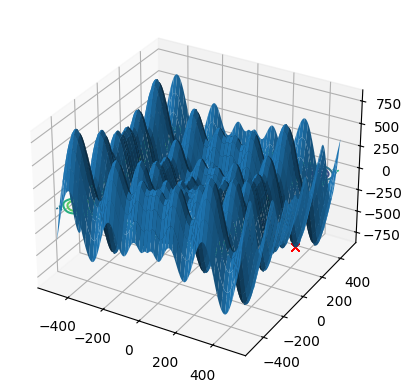

In [90]:
import matplotlib.pyplot as plt

# Here is the grid range
u = np.linspace(-500, 500, 500)
v = np.linspace(-500, 500, 500)
U,V = np.meshgrid(u,v)
UV = [ [u_i, v_j] for u_i,v_j in zip(U,V) ]
z = [fitness(pos) for pos in UV ]
Z = np.array(z)
Z = Z.reshape(500,500)

fig=plt.figure()
ax=fig.add_subplot(1, 1, 1, projection='3d')
ax.plot_surface(U, V, Z.T)
ax.contour(U, V, Z.T,zdir='z', offset=-0.5)
pso.plotData()

In [91]:
#other fitness functions
#def fitness(position): # Parabola
    #dims = len(position)
    #f = 0
    #for i in range(dims):
        #f = f + position[i] ** 2
    #return f


#def fitness(position): #Rastrigin
    #dims = len(position)
    #k = 10
    #f = 0
    #for i in range(dims):
       # f = f + (position[i] ** 2 - k * np.cos(2 * np.pi * position[i]))
    #f = f + dims * k
    #return f

def fitness(position): #Schwefel 7
    dims = len(position)
    f = 0
    for i in range(dims):
        f = f - position[i] * np.sin(np.sqrt(np.abs(position[i])))
    return f